<a href="https://colab.research.google.com/github/Ssactl/Applied-AI-in-Transportation/blob/main/Module3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Load the data



In [6]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

data overview

In [3]:
data.head()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            3080 non-null   int64 
 1   time_car      3080 non-null   int64 
 2   cost_car      3080 non-null   int64 
 3   time_bus      3080 non-null   int64 
 4   cost_bus      3080 non-null   int64 
 5   access_bus    3080 non-null   int64 
 6   time_air      3080 non-null   int64 
 7   cost_air      3080 non-null   int64 
 8   access_air    3080 non-null   int64 
 9   service_air   3080 non-null   object
 10  time_rail     3080 non-null   int64 
 11  cost_rail     3080 non-null   int64 
 12  access_rail   3080 non-null   int64 
 13  service_rail  3080 non-null   object
 14  choice        3080 non-null   object
dtypes: int64(12), object(3)
memory usage: 361.1+ KB


In [5]:
data.describe()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,time_rail,cost_rail,access_rail
count,3080.00000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000
mean,1540.50000,312.725649,40.024351,370.724026,24.965909,15.094156,69.866883,80.029221,45.060065,142.878247,54.944805,14.840909
std,889.26374,50.390302,7.083073,37.369174,7.100207,7.099092,14.241063,21.254481,7.073683,17.727864,14.069500,7.089921
min,1.00000,250.000000,30.000000,300.000000,15.000000,5.000000,50.000000,50.000000,35.000000,120.000000,35.000000,5.000000
25%,770.75000,275.000000,35.000000,345.000000,20.000000,10.000000,60.000000,65.000000,40.000000,130.000000,45.000000,10.000000
50%,1540.50000,300.000000,40.000000,390.000000,25.000000,15.000000,70.000000,80.000000,45.000000,140.000000,55.000000,15.000000
75%,2310.25000,345.000000,45.000000,390.000000,30.000000,20.000000,80.000000,95.000000,50.000000,155.000000,65.000000,20.000000
max,3080.00000,390.000000,50.000000,420.000000,35.000000,25.000000,90.000000,110.000000,55.000000,170.000000,75.000000,25.000000


data preparation

In [7]:
# one-hot encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

In [8]:
# remove unrelevant column ID
x = df.drop(['choice','ID',], axis=1)
y = df['choice']

In [9]:
# split the dataset into 80% training data and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

classification models

{'C': 0.01}
Accuracy: 0.5762987012987013
Precision: [0.55244755 0.25       0.49056604 0.66536965]
Recall: [0.57246377 0.04545455 0.52791878 0.66023166]


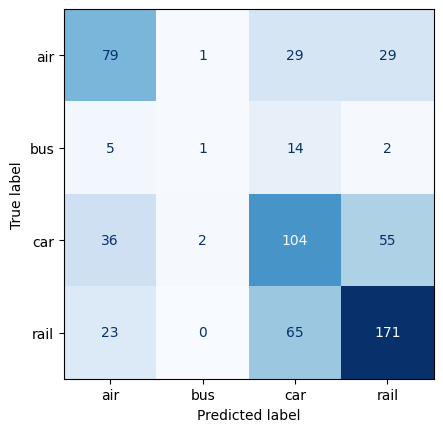

In [10]:
# 1.logistic regression
LR_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
LR_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), LR_params, cv=5, scoring='accuracy')
LR_grid_search.fit(x_train, y_train)
LR_best_params = LR_grid_search.best_params_
print(LR_best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = LR_grid_search.best_score_
LR_model = LR_grid_search.best_estimator_
cmd.from_estimator(LR_model, x_test, y_test,cmap='Blues',colorbar=False)
print(f'Accuracy: {accuracy_score(y_test,LR_model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,LR_model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,LR_model.predict(x_test),average=None)}')

{'n_neighbors': 9, 'weights': 'uniform'}
0.5381412952060556
Accuracy: 0.5324675324675324
Precision: [0.49710983 0.         0.4301676  0.64705882]
Recall: [0.62318841 0.         0.39086294 0.63706564]


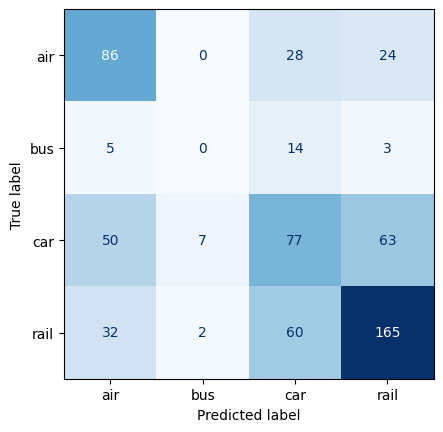

In [11]:
# 2.KNN
KNN_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
KNN_grid_search = GridSearchCV(KNeighborsClassifier(), KNN_params, cv=5, scoring='accuracy')
KNN_grid_search.fit(x_train, y_train)
KNN_best_params = KNN_grid_search.best_params_
print(KNN_best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
KNN_best_score = KNN_grid_search.best_score_
print(KNN_best_score)
KNN_model = KNN_grid_search.best_estimator_
cmd.from_estimator(KNN_model, x_test, y_test,cmap='Blues',colorbar=False)
print(f'Accuracy: {accuracy_score(y_test,KNN_model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,KNN_model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,KNN_model.predict(x_test),average=None)}')

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
0.5352949421989148
Accuracy: 0.5113636363636364
Precision: [0.49635036 0.25       0.4120603  0.5942029 ]
Recall: [0.49275362 0.04545455 0.41624365 0.63320463]


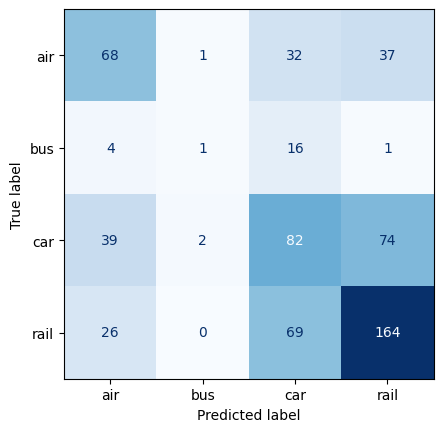

In [12]:
# 3.RF
RF_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
RF_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), RF_params, cv=5, scoring='accuracy')
RF_grid_search.fit(x_train, y_train)
RF_best_params = RF_grid_search.best_params_
print(RF_best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
RF_best_score = RF_grid_search.best_score_
print(RF_best_score)
RF_model = RF_grid_search.best_estimator_
cmd.from_estimator(RF_model, x_test, y_test,cmap='Blues',colorbar=False)
print(f'Accuracy: {accuracy_score(y_test,RF_model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,RF_model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,RF_model.predict(x_test),average=None)}')

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.5584359900394136
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


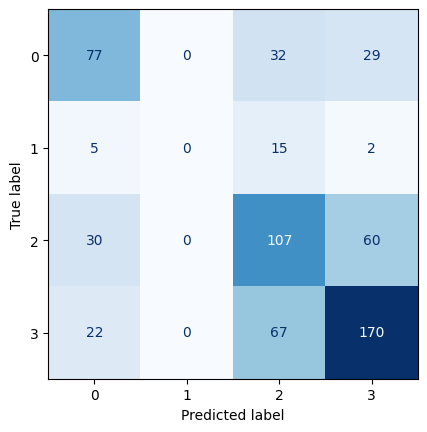

In [14]:
# 4.XGBoost

map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
XGB_y_train = y_train.map(map)
XGB_y_test = y_test.map(map)

XGBoost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
XGBoost_grid_search = GridSearchCV(XGBClassifier(), XGBoost_params, cv=5, scoring='accuracy')
XGBoost_grid_search.fit(x_train, XGB_y_train)
XGBoost_best_params = XGBoost_grid_search.best_params_
print(XGBoost_best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
XGBoost_best_score = XGBoost_grid_search.best_score_
print(XGBoost_best_score)
XGBoost_model = XGBoost_grid_search.best_estimator_
cmd.from_estimator(XGBoost_model, x_test, XGB_y_test,cmap='Blues',colorbar=False)
print(f'Accuracy: {accuracy_score(XGB_y_test,XGBoost_model.predict(x_test))}')
print(f'Precision: {precision_score(XGB_y_test,XGBoost_model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(XGB_y_test,XGBoost_model.predict(x_test),average=None)}')

{'C': 0.1, 'kernel': 'linear'}
0.5710244232259767
Accuracy: 0.560064935064935
Precision: [0.53521127 0.         0.46521739 0.66393443]
Recall: [0.55072464 0.         0.54314721 0.62548263]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


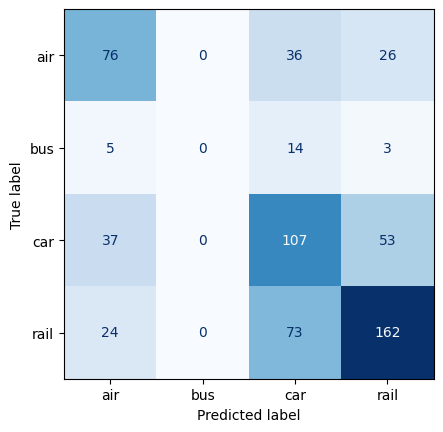

In [15]:
# 5.SVM

#normalize the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
SVM_x_train_scaled = scaler.fit_transform(x_train)
SVM_x_test_scaled = scaler.transform(x_test)

SVM_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
}
SVM_grid_search = GridSearchCV(SVC(), SVM_params, cv=5, scoring='accuracy')
SVM_grid_search.fit(SVM_x_train_scaled, y_train)
SVM_best_params = SVM_grid_search.best_params_
print(SVM_best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
SVM_best_score = SVM_grid_search.best_score_
print(SVM_best_score)
SVM_model = SVM_grid_search.best_estimator_
cmd.from_estimator(SVM_model, SVM_x_test_scaled, y_test,cmap='Blues',colorbar=False)
print(f'Accuracy: {accuracy_score(y_test,SVM_model.predict(SVM_x_test_scaled))}')
print(f'Precision: {precision_score(y_test,SVM_model.predict(SVM_x_test_scaled),average=None)}')
print(f'Recall: {recall_score(y_test,SVM_model.predict(SVM_x_test_scaled),average=None)}')